***
## Handwritten digits classification using neural network
***

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [15]:
X_train[7].shape

(28, 28)

In [16]:
X_train[7]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

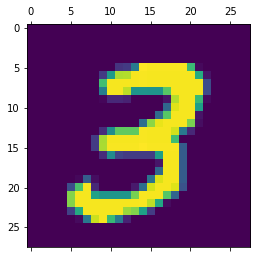

In [12]:
plt.matshow(X_train[7])

In [13]:
y_train[7]

3

In [14]:
X_train = X_train / 255
X_test = X_test / 255

In [17]:
X_train[7]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [18]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [19]:
X_train_flattened.shape

(60000, 784)

In [20]:
X_train_flattened[7]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

***
### Very simple neural network with no hidden layers
***

<img src="digits_nn.jpg" />

In [21]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

2022-01-03 22:46:27.222206: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
1875/1875 [==============================] - 2s 749us/step - loss: 0.4726 - accuracy: 0.8771
Epoch 2/5
1875/1875 [==============================] - 1s 707us/step - loss: 0.3040 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 1s 789us/step - loss: 0.2831 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 1s 734us/step - loss: 0.2729 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 1s 740us/step - loss: 0.2664 - accuracy: 0.9258


In [22]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 654us/step - loss: 0.2670 - accuracy: 0.9269


[0.26699256896972656, 0.9269000291824341]

In [23]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.2282124e-02, 3.5326727e-07, 5.8580935e-02, 9.5113754e-01,
       2.0789802e-03, 1.1688915e-01, 9.9762997e-07, 9.9974990e-01,
       9.8484665e-02, 6.7760891e-01], dtype=float32)

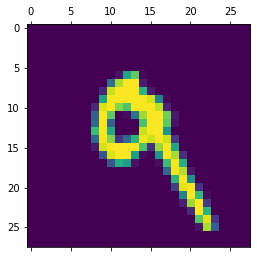

In [24]:
plt.matshow(X_test[7])

In [25]:
np.argmax(y_predicted[7])

9

In [26]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [27]:
y_predicted_labels[:7]

[7, 2, 1, 0, 4, 1, 4]

In [28]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    0,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1108,    3,    2,    0,    1,    4,    2,   15,    0],
       [   7,   10,  913,   17,    8,    6,   11,   10,   45,    5],
       [   4,    0,   18,  917,    1,   25,    2,    9,   23,   11],
       [   2,    1,    4,    1,  918,    0,    8,    3,    9,   36],
       [  10,    3,    2,   28,    9,  781,   12,    4,   35,    8],
       [  11,    3,    7,    1,    8,   14,  908,    2,    4,    0],
       [   2,    6,   20,    8,    9,    1,    0,  933,    4,   45],
       [   5,    6,    5,   15,    9,   22,    7,    6,  891,    8],
       [  11,    7,    1,    8,   22,    6,    0,   11,    7,  936]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

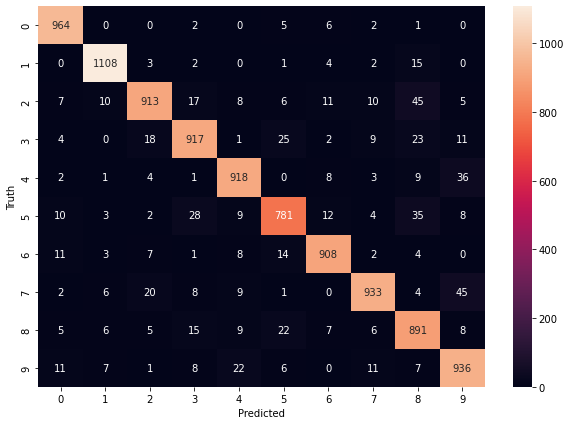

In [29]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [30]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 992us/step - loss: 0.2712 - accuracy: 0.9226
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1221 - accuracy: 0.9635
Epoch 3/5
1875/1875 [==============================] - 2s 956us/step - loss: 0.0862 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 2s 912us/step - loss: 0.0664 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0518 - accuracy: 0.9839


In [31]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 767us/step - loss: 0.0827 - accuracy: 0.9742


[0.08268401771783829, 0.9742000102996826]

Text(69.0, 0.5, 'Truth')

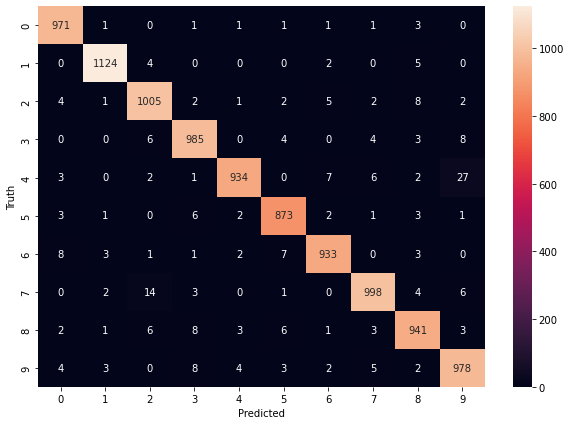

In [32]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

***
### Using hidden layer
***

In [33]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2724 - accuracy: 0.9219
Epoch 2/10
1875/1875 [==============================] - 2s 973us/step - loss: 0.1244 - accuracy: 0.9636
Epoch 3/10
1875/1875 [==============================] - 2s 930us/step - loss: 0.0866 - accuracy: 0.9740
Epoch 4/10
1875/1875 [==============================] - 2s 924us/step - loss: 0.0665 - accuracy: 0.9798
Epoch 5/10
1875/1875 [==============================] - 2s 928us/step - loss: 0.0534 - accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0434 - accuracy: 0.9863
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0341 - accuracy: 0.9894
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0293 - accuracy: 0.9908
Epoch 9/10
1875/1875 [==============================] - 2s 991us/step - loss: 0.0235 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 2s 980us/step -

In [34]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 753us/step - loss: 0.0757 - accuracy: 0.9777


[0.07573721557855606, 0.9776999950408936]